In [8]:
import pandas as pd
import numpy as np

In [13]:
tipe = {
    'date': np.unicode_, 
     'humidity': np.float32, 
     'temp': np.float32,
     'vibra': np.unicode_,
     'piezoVibra': np.float32
    }

In [ ]:
df = pd.read_csv('DataTanah.csv',dtype=tipe )

In [9]:
df = pd.read_csv('databesar2/DataTanahBesar.csv',dtype=tipe)

In [ ]:
df['vibra'].apply(str)

In [10]:
df.describe()

,humidity,temp,piezoVibra
count,686803.000000,686803.000000,686803.000000
mean,36.522827,49.024734,0.230629
std,30.464767,20.975994,0.680604
min,10.000000,16.000000,0.000000
25%,10.340000,27.889999,0.000000
50%,19.830000,54.919998,0.024000
75%,64.680000,64.779999,0.129000
max,99.000000,78.000000,4.000000


In [ ]:
print(df)

In [ ]:
df.mad()

In [ ]:
df.kurt()

In [11]:
df.corr(method='pearson')
#‘pearson’, ‘kendall’, ‘spearman’

,humidity,temp,piezoVibra
humidity,1.000000,0.120210,0.496006
temp,0.120210,1.000000,0.021435
piezoVibra,0.496006,0.021435,1.000000


In [ ]:
df.cov()

In [ ]:
df.diff()

In [ ]:
df.var()

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

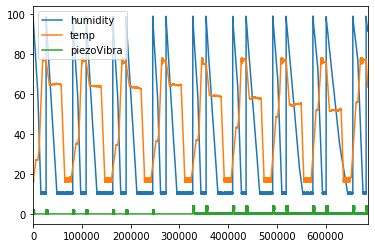

In [12]:
df.plot()

In [ ]:
df.plot.box()

In [ ]:
df.plot.hist(stacked=True, bins=20)

In [ ]:
import seaborn as sns

In [ ]:
ax = sns.heatmap(df.corr())
print(df.corr())

In [ ]:
from sqlalchemy import create_engine
from pandas.io import sql

In [ ]:
engine = create_engine('sqlite:///:memory:')
df.to_sql('tanahlongsor',engine)

In [ ]:
q = """SELECT date,humidity,temp,vibra,piezoVibra 
FROM tanahlongsor 
WHERE date BETWEEN '2020-04-01 11:00:00' 
AND '2020-04-01 11:30:00'"""
q1 = """SELECT date,humidity,temp,vibra,piezoVibra 
FROM tanahlongsor 
WHERE humidity BETWEEN 50 
AND 60"""
res = pd.read_sql_query(q,engine)

In [ ]:
print(res)

In [ ]:
res.describe()

In [ ]:
res.plot()

In [ ]:
res.to_excel("jam.xls",index=False)